# Лабораторная работа №3 (Методы спуска)
---
### Работу выполнили:
Обиджанов Алишер<br>
Кузнецов Павел<br>
Казаков Андрей<br>

[*Сслыка на репозиторий*](https://github.com/Iamnotagenius/Primat)

---
### Градиентный спуск с постоянным шагом:
**Теория:**

$F(x_1, x_2, \dots, x_n) \rightarrow min$

Если функция $F$ диффернцируется, то задачу на минимум можно решать с помощью градиентных методов.

$\nabla F(x) =
\left(
    \begin{matrix}
    \frac{\partial F}{\partial x_1}\\
    \frac{\partial F}{\partial x_2}\\
    \dots\\
    \frac{\partial F}{\partial x_n}
    \end{matrix}
\right)$

$x^0=
\left(
    \begin{matrix}
    x^0_1\\
    \dots\\
    x^0_n
    \end{matrix}
\right) \qquad x^1= x^0-\nabla \alpha F(x^0) \qquad x^i=x^{i-1}-\nabla \alpha F(x^{i-1})$

$\alpha$ - скорость спуска, $\alpha > 0$ (Чем меньше $\alpha$, тем точнее шаг)

Для того, что бы найти шаг:

$\nabla F(x^1(\alpha)) \rightarrow \underset{\alpha}{min}$

$\alpha = arg\space\underset{\alpha}{min} \nabla F(x'(\alpha))$

**Реализуем пример в коде:**

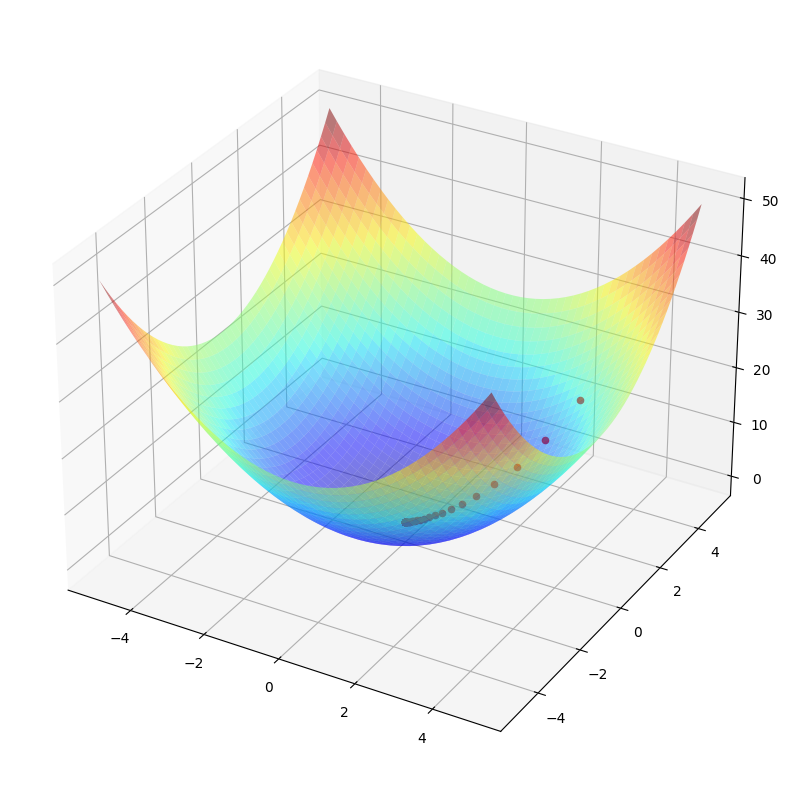

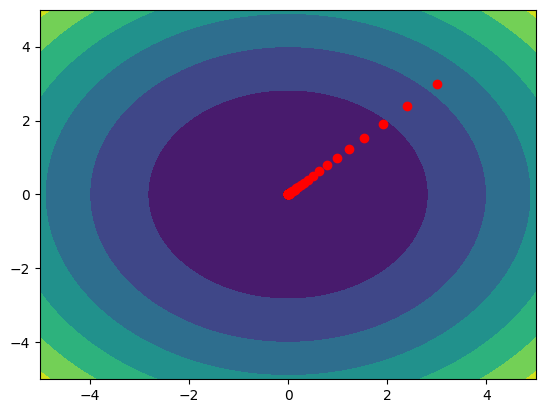

In [94]:
import numpy as np
import matplotlib.pyplot as plt

constantStepIters = 0
stepSplitIters = 0
steepestDescentIters = 0
conjugateGradientIters = 0

def dx(f, h=0.0001):
    return lambda x: (f(np.array([x[0]+h, x[1]])) - f(np.array([x[0]-h, x[1]]))) / (2*h)

def dy(f, h=0.0001):
    return lambda x: (f(np.array([x[0], x[1]+h])) - f(np.array([x[0], x[1]-h]))) / (2*h)

def grad(f, x, h=0.0001):
    return np.array([dx(f, h)(x), dy(f, h)(x)])

def random_quadratic(n, k):
    # Генерируем случайную матрицу A размера n x n с числом обусловленности k
    Q, _ = np.linalg.qr(np.random.randn(n, n))
    D = np.diag(np.linspace(1, k, n))
    A = Q @ D @ Q.T
    
    # Генерируем случайный вектор b размера n
    b = np.random.randn(n)
    
    # Генерируем случайное число c
    c = np.random.randn()
    
    # Возвращаем функцию f(x) = x^T A x + b^T x + c
    return lambda x: x.T @ A @ x + b.T @ x + c

def_grid = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
def new_axes(f, grid=def_grid):
    zgrid = np.array([f(np.array([x, y])) for x, y in zip(grid[0].ravel(), grid[1].ravel())]).reshape(grid[0].shape)
    fig = plt.figure(figsize=(10,10))
    ax3d = fig.add_subplot(111, projection='3d')
    ax3d.plot_surface(*grid, zgrid, cmap='jet', alpha=0.5)

    _, axcont = plt.subplots()
    axcont.contourf(*grid, zgrid)

    return ax3d, axcont

def scatter(axes, x, y, z, **kwargs):
    axes[0].scatter(x, y, z, **kwargs)
    axes[1].scatter(x, y, **kwargs)

# определим функцию градиентного спуска
def gradient_descent(f, start_point, eps):
    axes = new_axes(f)
    point = np.array(start_point)
    global constantStepIters
    scatter(axes, *point, f(point), color='r')
    while np.linalg.norm(grad(f, point)) >= eps:
        point = point - eps * grad(f, point)
        scatter(axes, *point, f(point), color='r')
        constantStepIters += 1

    plt.show()

# зададим функцию, начальную точку и скорость спуска
f = lambda x: x[0]**2 + x[1]**2
# f = random_quadratic(2, 4)
start_point = np.array([3, 3])
step_size = 0.1
num_iterations = 100

# выполним градиентный спуск
gradient_descent(f, start_point, step_size)

### Градиентный спуск с дроблением шага и условием Армихо:

Рассматривается функция
$$\phi_k(\alpha):=f(x_k+ad_k)$$
Заметим, что
$$\phi_k(\alpha)=\nabla f(x_k+\alpha d_k)^T d_k$$
Поскольку d_k является направлением спуска, то $\phi'(0)=\nabla f(x_k)^T d_k <0$

**Условием Армихо** для $\alpha$ называется выполнение следующего неравенства:
$$\phi_k(\alpha) \le \phi_k(0) + c_1\alpha\phi'_k(0)$$
где $c_1 \in (0, 0.5)$ - некоторая константа

**Реализуем пример в коде:**

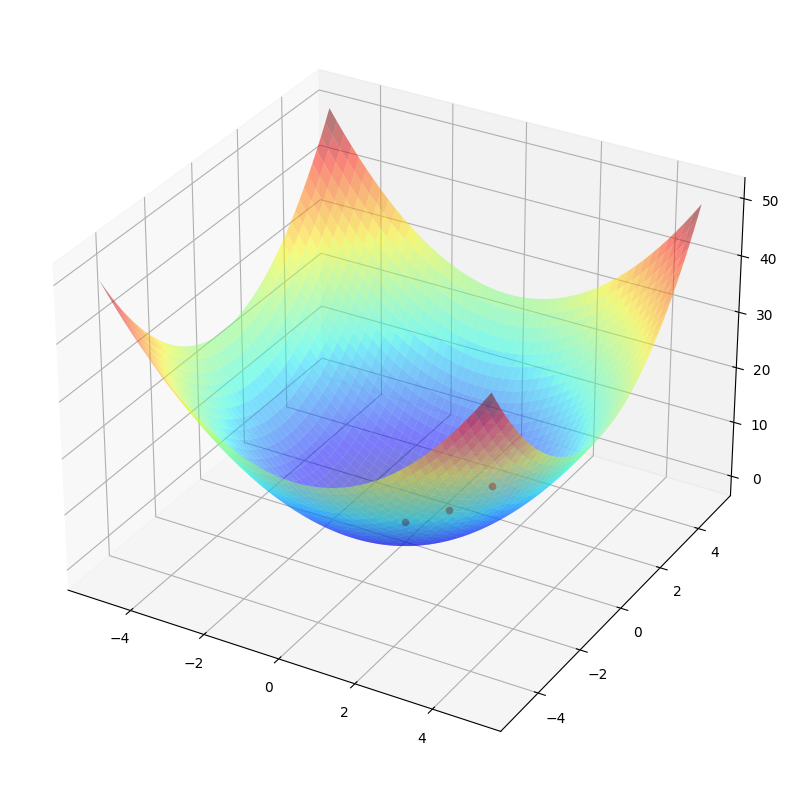

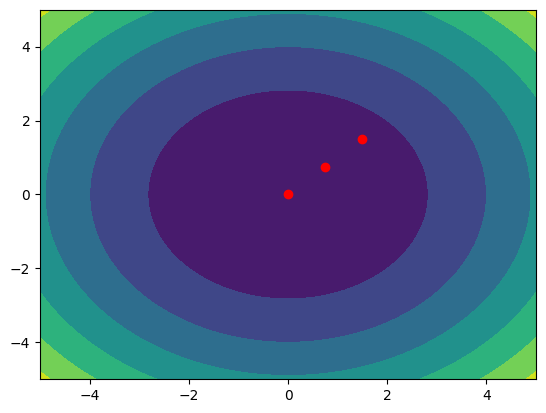

In [95]:


def Arm(f = f, x0 = start_point, max_iters = 100, alpha = 1, beta = 0.5, eps = 0.00001, iters = 0):
    # создание графика
    axes = new_axes(f)
    global stepSplitIters
    # обновление весов
    while iters < max_iters:
        g = grad(f, x0)
        step = alpha
        while f((x0 - step*g)) > f(x0) + beta*step*np.dot(g, -g):
            step *= 0.5
        x1 = x0 - step*g
        if np.linalg.norm(x0-x1) < eps:
            break
        x0 = x1
        iters += 1
        scatter(axes, *x0, f(x0), color='r')
        stepSplitIters += 1

plt.show()

Arm()

### Метод наискорейшего спуска:

В этом случае мы из точки $x^{[k]}$ будем двигаться в направлении антиградиента до тех пор пока не достигнем минимума функции f на этом направлении, т.е. на луче
$$L={x=x^{[k]}-\lambda f'(x^{[k]});\quad\lambda \le 0}$$
$$\lambda^{[k]}=arg\space\underset{\lambda\in[0,\infty)}{min} f(x^{[K]}-\lambda f'(x^{[k]}))$$

$\lambda$  - Величина шага, для её определения используется любой метод одномерной оптимизации. В нашем случае используется метод фибоначи

**Реализуем пример в коде:**

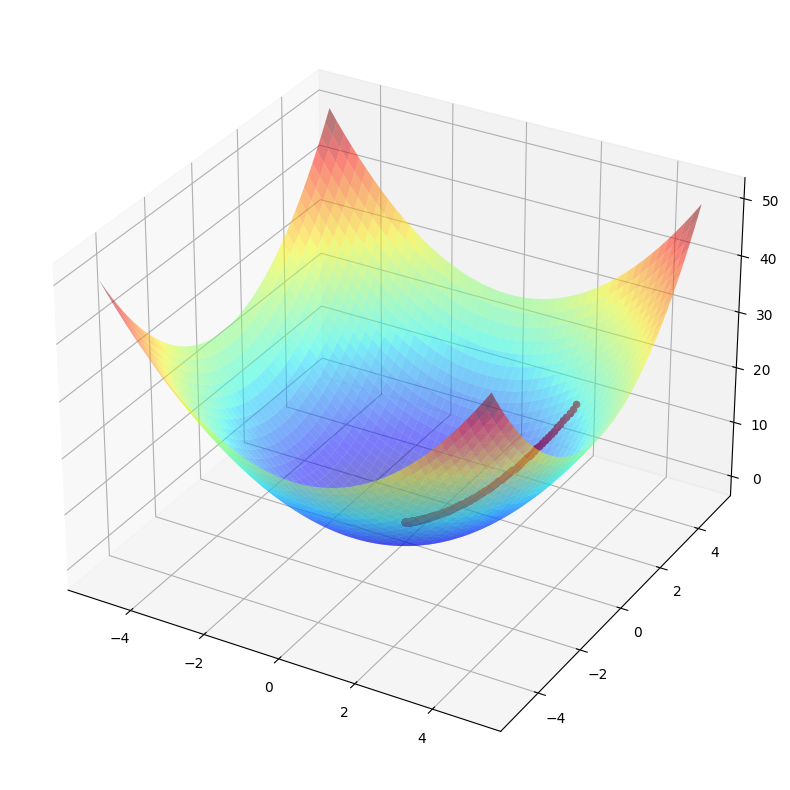

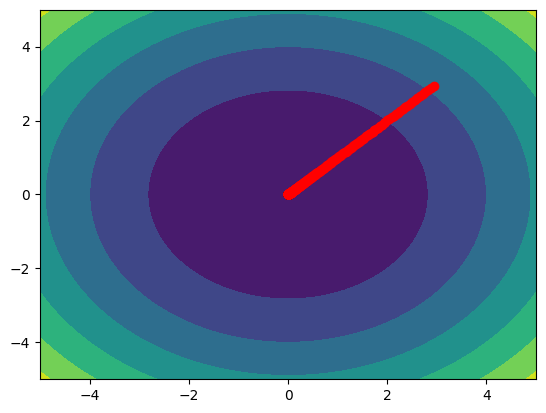

In [96]:
axes = new_axes(f)

def fibonacci_search(f, a, b, n=100):
    fib = [1, 1]
    for i in range(2, n+1):
        fib.append(fib[i-1] + fib[i-2])
    rho = (fib[n-2] / fib[n]) * (b - a)
    x1 = a + rho
    x2 = b - rho
    f1 = f(x1)
    f2 = f(x2)
    for i in range(n-1):
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            rho = (fib[n-i-3] / fib[n-i-1]) * (b - a)
            x1 = a + rho
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            rho = (fib[n-i-3] / fib[n-i-1]) * (b - a)
            x2 = b - rho
            f2 = f(x2)
    return (a + b) / 2

def gradient_descent(f, x0, alpha=0.01, epsilon=0.00001, max_iter=1000):
    x = x0
    global steepestDescentIters
    for _ in range(max_iter):
        g = grad(f, x)
        if abs(g[0]) < epsilon and abs(g[1]) < epsilon:
            break
        d = -alpha*g
        a = fibonacci_search(lambda t: f(x + t*d), 0, 1)
        x = x + a*d
        scatter(axes, *x, f(x), color='red')
        steepestDescentIters += 1
    return x

gradient_descent(f, start_point)

plt.show()

### Метод сопряженных градиентов

$$F(x)\rightarrow min, x\in R^n$$

$F(x)$ - неприрывно дифференцируемая в $R^n$ функция. Что бы модифицировать метод сопряжённых градиентов для этой задачи необходимо получить для $p_k,\alpha_k, \beta_k$ формулы, в которые не входит мтарица А:

$$\alpha = arg\underset{\alpha_k}F(x_{k-1}+\alpha_k p_k)$$
$$p_{k+1}=-F'(x_k)+\beta_k p_k$$

1. $\beta_k = -\frac{\langle F'(x_k),F'(x_k) \rangle}{\langle F'(x_{k-1}),F(x_{k-1}) \rangle}$ - Метод Флетчера - Ривса

2. $\beta_k = \frac{\langle F'(x_k),F'(x_k) - F'(x_{k-1}) \rangle}{\langle F'(x_{k-1}),F(x_{k-1}) \rangle}$ - Метод Полака-Райберга

3. $\beta_k = \frac{\langle F''(x_k)p_k,F'(x_k) \rangle}{\langle F''(x_{k-1})p_k,p_k \rangle}$

Если функция $F(x)$ - квадратичная и строго выпуклая, то все три формулы дают одинаковый результат. Если $F(x)$ - произвольная функция, то каждой из формул соответствует своя модификация методта сопряжённых градиентов. Третья формула используется редко, так как она требует, что бы функция $F(x)\in C^2(R^n)$ и вычисления гессиана  функции $F(x)$ на каждом шаге метода

**Реализуем пример в коде:**

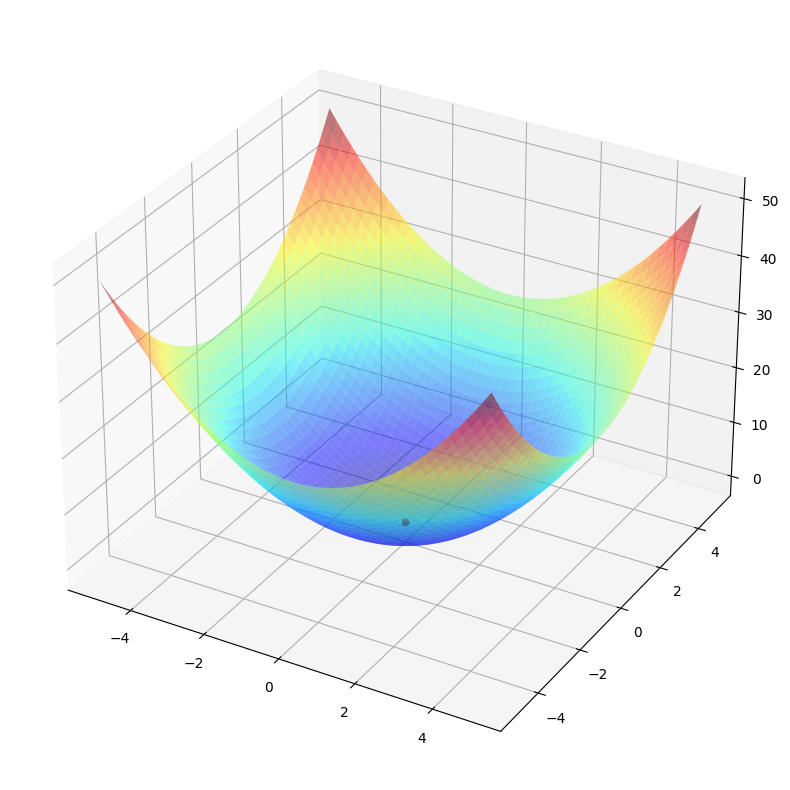

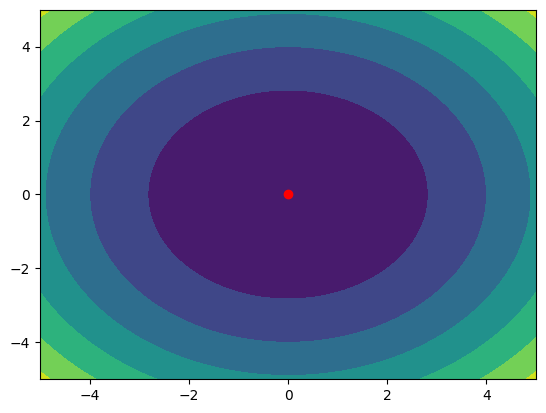

In [97]:
def hessian(f, x):
    return np.array([
        [dx(dx(f))(x), dy(dx(f))(x)],
        [dx(dy(f))(x), dy(dy(f))(x)]
    ])

axes = new_axes(f)

def fletcher_rives_method(f, x0, epsilon=0.0001, max_iter=1000):
    global grad
    x = x0
    g = grad(f, x)
    d = -g
    delta = np.dot(g, g)
    global conjugateGradientIters
    for _ in range(max_iter):
        alpha = delta / np.dot(d, np.dot(hessian(f, x), d))
        x = x + alpha*d
        scatter(axes, *x, f(x), color='red')
        grad_new = grad(f, x)
        delta_new = np.dot(grad_new, grad_new)
        beta = delta_new / delta
        d = -grad_new + beta*d
        g = grad_new
        delta = delta_new
        conjugateGradientIters += 1
        if abs(g[0]) < epsilon and abs(g[1]) < epsilon:
            break
    return x
fletcher_rives_method(f, start_point)

plt.show()

In [98]:
from tabulate import tabulate

def outIterations():
    Head =  ["Method name", "Iterations"]

    Data = [
        ["constant step", constantStepIters],
        ["with step split", stepSplitIters],
        ["steepest descent", steepestDescentIters],
        ["conjugate gradient", conjugateGradientIters],
    ]
    print(tabulate(Data, headers=Head))

outIterations()

Method name           Iterations
------------------  ------------
constant step                100
with step split                3
steepest descent             659
conjugate gradient             1


### Вычислим количество итераций для всех методов при разных числах обусловленности

In [99]:
for i in range(1, 6):
    f = random_quadratic(2, 4)
    start_point = np.array([3, 3])
    step_size = 0.00005
    num_iterations = 100
    
    gradient_descent(f, start_point, step_size, num_iterations)
    Arm(f, start_point, num_iterations)
    fletcher_rives_method(f, start_point)
    
    print("При k =", i)
    outIterations()
    print("_________________________________________")
    
plt.close('all')
    

При k = 1
Method name           Iterations
------------------  ------------
constant step                100
with step split                5
steepest descent             659
conjugate gradient             3
_________________________________________
При k = 2
Method name           Iterations
------------------  ------------
constant step                100
with step split                8
steepest descent             659
conjugate gradient             5
_________________________________________
При k = 3
Method name           Iterations
------------------  ------------
constant step                100
with step split               13
steepest descent             659
conjugate gradient             7
_________________________________________
При k = 4
Method name           Iterations
------------------  ------------
constant step                100
with step split               15
steepest descent             659
conjugate gradient             9
_________________________________________
